# Telcom Churn Prediction

Here’s a dataset of telecom customers, which you can also find on kaggle. There is data available on 5’986 customers.

Which customers are likely to churn? What are the attributes that make you think so?

The features:

    customerID - customer id
    gender - client gender (male / female)
    SeniorCitizen - is the client retired (1, 0)
    Partner - is the client married (Yes, No)
    tenure - how many months a person has been a client of the company
    PhoneService - is the telephone service connected (Yes, No)
    MultipleLines - are multiple phone lines connected (Yes, No, No phone service)
    InternetService - client’s Internet service provider (DSL, Fiber optic, No)
    OnlineSecurity - is the online security service connected (Yes, No, No internet service)
    OnlineBackup - is the online backup service activated (Yes, No, No internet service)
    DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)
    TechSupport - is the technical support service connected (Yes, No, No internet service)
    StreamingTV - is the streaming TV service connected (Yes, No, No internet service)
    StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)
    Contract - type of customer contract (Month-to-month, One year, Two year)
    PaperlessBilling - whether the client uses paperless billing (Yes, No)
    PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
    MonthlyCharges - current monthly payment
    TotalCharges - the total amount that the client paid for the services for the entire time
    Churn - whether there was a churn (Yes or No)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [10]:
import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing

In [63]:
df = pd.read_csv('../data/raw/telecom_users.csv')
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [64]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


In [66]:
# Customer ID
df['customerID'].nunique()

5986

In [67]:
# Drop Customer ID
df.drop(columns="customerID", inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [71]:
# Check if elements in 'TotalCharges' are not floats
non_float_mask = pd.to_numeric(df['TotalCharges'], errors='coerce').isna()

# Display elements that are not floats
non_float_elements = df[non_float_mask]['TotalCharges']
non_float_elements

356      
634      
2771     
3086     
3255     
4326     
5375     
5382     
5695     
5951     
Name: TotalCharges, dtype: object

In [73]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [74]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5976 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5976 non-null   object 
 1   SeniorCitizen     5976 non-null   object 
 2   Partner           5976 non-null   object 
 3   Dependents        5976 non-null   object 
 4   tenure            5976 non-null   int64  
 5   PhoneService      5976 non-null   object 
 6   MultipleLines     5976 non-null   object 
 7   InternetService   5976 non-null   object 
 8   OnlineSecurity    5976 non-null   object 
 9   OnlineBackup      5976 non-null   object 
 10  DeviceProtection  5976 non-null   object 
 11  TechSupport       5976 non-null   object 
 12  StreamingTV       5976 non-null   object 
 13  StreamingMovies   5976 non-null   object 
 14  Contract          5976 non-null   object 
 15  PaperlessBilling  5976 non-null   object 
 16  PaymentMethod     5976 non-null   object 
 17  

In [75]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numeric_features = df.select_dtypes(exclude=['object']).columns.tolist()

categorical_features, numeric_features

(['gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'Churn'],
 ['tenure', 'MonthlyCharges', 'TotalCharges'])

In [76]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1525
TotalCharges        5610
Churn                  2
dtype: int64

### Scale numerical features

In [77]:
from sklearn.preprocessing import StandardScaler

df_scaled = df.copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to each column
for column in numeric_features:
    df_scaled[column] = scaler.fit_transform(df_scaled[column].values.reshape(-1, 1))

df[numeric_features], df_scaled[numeric_features]

(      tenure  MonthlyCharges  TotalCharges
 0         72           24.10       1734.65
 1         44           88.15       3973.20
 2         38           74.95       2869.85
 3          4           55.90        238.50
 4          2           53.45        119.50
 ...      ...             ...           ...
 5981       1           95.00         95.00
 5982      23           91.10       2198.30
 5983      12           21.15        306.05
 5984      12           99.45       1200.15
 5985      26           19.80        457.30
 
 [5976 rows x 3 columns],
         tenure  MonthlyCharges  TotalCharges
 0     1.611381       -1.353483     -0.247769
 1     0.468468        0.774066      0.736669
 2     0.223558        0.335602      0.251453
 3    -1.164265       -0.297182     -0.905725
 4    -1.245901       -0.378564     -0.958057
 ...        ...             ...           ...
 5981 -1.286719        1.001603     -0.968831
 5982 -0.388717        0.872057     -0.043871
 5983 -0.837718       -1.45147

### Encode categorical features

Label Encoding


In [78]:
from sklearn.preprocessing import LabelEncoder

df_label = df_scaled.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Create a dictionary to store the feature dictionaries
feature_dicts = {}

# Apply label encoding to each column
for column in categorical_features:
    df_label[column] = label_encoder.fit_transform(df[column])

    # Create a mapping from encoded labels to raw data
    encoded_to_raw_mapping = {}
    for encoded_label in df_label[column]:
        raw_category = label_encoder.inverse_transform([encoded_label])[0]
        encoded_to_raw_mapping[encoded_label] = raw_category
    print(encoded_to_raw_mapping)
    feature_dicts[column] = encoded_to_raw_mapping

df[categorical_features], df_label[categorical_features]

{1: 'Male', 0: 'Female'}
{0: 0, 1: 1}
{1: 'Yes', 0: 'No'}
{1: 'Yes', 0: 'No'}
{1: 'Yes', 0: 'No'}
{2: 'Yes', 0: 'No', 1: 'No phone service'}
{2: 'No', 1: 'Fiber optic', 0: 'DSL'}
{1: 'No internet service', 0: 'No', 2: 'Yes'}
{1: 'No internet service', 2: 'Yes', 0: 'No'}
{1: 'No internet service', 2: 'Yes', 0: 'No'}
{1: 'No internet service', 0: 'No', 2: 'Yes'}
{1: 'No internet service', 2: 'Yes', 0: 'No'}
{1: 'No internet service', 0: 'No', 2: 'Yes'}
{2: 'Two year', 0: 'Month-to-month', 1: 'One year'}
{0: 'No', 1: 'Yes'}
{1: 'Credit card (automatic)', 0: 'Bank transfer (automatic)', 2: 'Electronic check', 3: 'Mailed check'}
{0: 'No', 1: 'Yes'}


(      gender SeniorCitizen Partner Dependents PhoneService MultipleLines  \
 0       Male             0     Yes        Yes          Yes           Yes   
 1     Female             0      No         No          Yes            No   
 2     Female             1     Yes         No          Yes           Yes   
 3       Male             0      No         No          Yes            No   
 4       Male             0      No         No          Yes            No   
 ...      ...           ...     ...        ...          ...           ...   
 5981    Male             0     Yes         No          Yes            No   
 5982  Female             0     Yes        Yes          Yes           Yes   
 5983    Male             0     Yes        Yes          Yes            No   
 5984    Male             1      No         No          Yes           Yes   
 5985    Male             0      No         No          Yes            No   
 
      InternetService       OnlineSecurity         OnlineBackup  \
 0     

In [79]:
# Get the mapping of label encoding
feature_dicts


{'gender': {1: 'Male', 0: 'Female'},
 'SeniorCitizen': {0: 0, 1: 1},
 'Partner': {1: 'Yes', 0: 'No'},
 'Dependents': {1: 'Yes', 0: 'No'},
 'PhoneService': {1: 'Yes', 0: 'No'},
 'MultipleLines': {2: 'Yes', 0: 'No', 1: 'No phone service'},
 'InternetService': {2: 'No', 1: 'Fiber optic', 0: 'DSL'},
 'OnlineSecurity': {1: 'No internet service', 0: 'No', 2: 'Yes'},
 'OnlineBackup': {1: 'No internet service', 2: 'Yes', 0: 'No'},
 'DeviceProtection': {1: 'No internet service', 2: 'Yes', 0: 'No'},
 'TechSupport': {1: 'No internet service', 0: 'No', 2: 'Yes'},
 'StreamingTV': {1: 'No internet service', 2: 'Yes', 0: 'No'},
 'StreamingMovies': {1: 'No internet service', 0: 'No', 2: 'Yes'},
 'Contract': {2: 'Two year', 0: 'Month-to-month', 1: 'One year'},
 'PaperlessBilling': {0: 'No', 1: 'Yes'},
 'PaymentMethod': {1: 'Credit card (automatic)',
  0: 'Bank transfer (automatic)',
  2: 'Electronic check',
  3: 'Mailed check'},
 'Churn': {0: 'No', 1: 'Yes'}}

In [80]:
import pickle

# Save the dictionary to a file using pickle
with open('../data/processed/label_encoding_mapping_dict.pkl', 'wb') as file:
    pickle.dump(feature_dicts, file)

In [91]:
# Load the dictionary from a pickle file
with open('../data/processed/label_encoding_mapping_dict.pkl', 'rb') as file:
    encoding_mapping = pickle.load(file)

encoding_mapping

{'gender': {1: 'Male', 0: 'Female'},
 'SeniorCitizen': {0: 0, 1: 1},
 'Partner': {1: 'Yes', 0: 'No'},
 'Dependents': {1: 'Yes', 0: 'No'},
 'PhoneService': {1: 'Yes', 0: 'No'},
 'MultipleLines': {2: 'Yes', 0: 'No', 1: 'No phone service'},
 'InternetService': {2: 'No', 1: 'Fiber optic', 0: 'DSL'},
 'OnlineSecurity': {1: 'No internet service', 0: 'No', 2: 'Yes'},
 'OnlineBackup': {1: 'No internet service', 2: 'Yes', 0: 'No'},
 'DeviceProtection': {1: 'No internet service', 2: 'Yes', 0: 'No'},
 'TechSupport': {1: 'No internet service', 0: 'No', 2: 'Yes'},
 'StreamingTV': {1: 'No internet service', 2: 'Yes', 0: 'No'},
 'StreamingMovies': {1: 'No internet service', 0: 'No', 2: 'Yes'},
 'Contract': {2: 'Two year', 0: 'Month-to-month', 1: 'One year'},
 'PaperlessBilling': {0: 'No', 1: 'Yes'},
 'PaymentMethod': {1: 'Credit card (automatic)',
  0: 'Bank transfer (automatic)',
  2: 'Electronic check',
  3: 'Mailed check'},
 'Churn': {0: 'No', 1: 'Yes'}}

In [81]:
df_label.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,1.611381,1,2,2,1,1,1,1,1,1,2,0,1,-1.353483,-0.247769,0
1,0,0,0,0,0.468468,1,0,1,0,2,2,0,2,0,0,1,1,0.774066,0.736669,0
2,0,1,1,0,0.223558,1,2,1,0,0,0,0,0,0,0,1,0,0.335602,0.251453,1
3,1,0,0,0,-1.164265,1,0,0,0,0,0,0,0,2,0,1,2,-0.297182,-0.905725,0
4,1,0,0,0,-1.245901,1,0,0,2,0,2,0,0,0,0,0,2,-0.378564,-0.958057,0
5,0,0,1,0,1.529744,0,1,0,2,0,2,2,0,2,2,1,0,-0.498145,0.471490,0
6,0,0,0,0,0.019467,1,2,1,2,0,0,0,0,2,0,1,2,0.857109,0.304115,0
7,0,0,0,0,-1.286719,0,1,0,0,0,0,0,0,0,0,1,3,-1.326910,-0.999659,0
8,1,0,0,0,0.264376,0,1,0,0,0,2,2,0,0,1,0,3,-0.973148,-0.434889,0
9,1,1,0,0,0.917469,1,2,1,2,2,2,2,2,2,0,1,2,1.715769,1.796219,0


In [82]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5976 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5976 non-null   int32  
 1   SeniorCitizen     5976 non-null   int32  
 2   Partner           5976 non-null   int32  
 3   Dependents        5976 non-null   int32  
 4   tenure            5976 non-null   float64
 5   PhoneService      5976 non-null   int32  
 6   MultipleLines     5976 non-null   int32  
 7   InternetService   5976 non-null   int32  
 8   OnlineSecurity    5976 non-null   int32  
 9   OnlineBackup      5976 non-null   int32  
 10  DeviceProtection  5976 non-null   int32  
 11  TechSupport       5976 non-null   int32  
 12  StreamingTV       5976 non-null   int32  
 13  StreamingMovies   5976 non-null   int32  
 14  Contract          5976 non-null   int32  
 15  PaperlessBilling  5976 non-null   int32  
 16  PaymentMethod     5976 non-null   int32  
 17  

In [83]:
# Save the DataFrame to a CSV file
df_label.to_csv('../data/processed/label_encoding_standard_scaling_data.csv', index=False)

In [86]:
df_label = pd.read_csv('../data/processed/label_encoding_standard_scaling_data.csv')
df_label.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,1.611381,1,2,2,1,1,1,1,1,1,2,0,1,-1.353483,-0.247769,0
1,0,0,0,0,0.468468,1,0,1,0,2,2,0,2,0,0,1,1,0.774066,0.736669,0
2,0,1,1,0,0.223558,1,2,1,0,0,0,0,0,0,0,1,0,0.335602,0.251453,1
3,1,0,0,0,-1.164265,1,0,0,0,0,0,0,0,2,0,1,2,-0.297182,-0.905725,0
4,1,0,0,0,-1.245901,1,0,0,2,0,2,0,0,0,0,0,2,-0.378564,-0.958057,0
5,0,0,1,0,1.529744,0,1,0,2,0,2,2,0,2,2,1,0,-0.498145,0.471490,0
6,0,0,0,0,0.019467,1,2,1,2,0,0,0,0,2,0,1,2,0.857109,0.304115,0
7,0,0,0,0,-1.286719,0,1,0,0,0,0,0,0,0,0,1,3,-1.326910,-0.999659,0
8,1,0,0,0,0.264376,0,1,0,0,0,2,2,0,0,1,0,3,-0.973148,-0.434889,0
9,1,1,0,0,0.917469,1,2,1,2,2,2,2,2,2,0,1,2,1.715769,1.796219,0


One-Hot Encoding (Dummies)

In [87]:
df_onehot = df_scaled.copy()
#df_onehot

df_onehot = pd.get_dummies(df_onehot, columns=categorical_features)

# Replace spaces with underscores in column names
df_onehot.columns = df_onehot.columns.str.replace(' ', '_')
df_onehot

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,Contract_One_year,Contract_Two_year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check,Churn_No,Churn_Yes
0,1.611381,-1.353483,-0.247769,False,True,True,False,False,True,False,...,False,True,True,False,False,True,False,False,True,False
1,0.468468,0.774066,0.736669,True,False,True,False,True,False,True,...,False,False,False,True,False,True,False,False,True,False
2,0.223558,0.335602,0.251453,True,False,False,True,False,True,True,...,False,False,False,True,True,False,False,False,False,True
3,-1.164265,-0.297182,-0.905725,False,True,True,False,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,-1.245901,-0.378564,-0.958057,False,True,True,False,True,False,True,...,False,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,-1.286719,1.001603,-0.968831,False,True,True,False,False,True,True,...,False,False,False,True,False,False,True,False,False,True
5982,-0.388717,0.872057,-0.043871,True,False,True,False,False,True,False,...,False,True,False,True,False,True,False,False,True,False
5983,-0.837718,-1.451473,-0.876018,False,True,True,False,False,True,False,...,False,False,False,True,False,False,True,False,True,False
5984,-0.837718,1.149419,-0.482824,False,True,False,True,True,False,True,...,False,False,False,True,False,False,True,False,False,True


In [88]:
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5976 entries, 0 to 5985
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   5976 non-null   float64
 1   MonthlyCharges                           5976 non-null   float64
 2   TotalCharges                             5976 non-null   float64
 3   gender_Female                            5976 non-null   bool   
 4   gender_Male                              5976 non-null   bool   
 5   SeniorCitizen_0                          5976 non-null   bool   
 6   SeniorCitizen_1                          5976 non-null   bool   
 7   Partner_No                               5976 non-null   bool   
 8   Partner_Yes                              5976 non-null   bool   
 9   Dependents_No                            5976 non-null   bool   
 10  Dependents_Yes                           5976 non-nul

In [89]:
# Save the DataFrame to a CSV file
df_onehot.to_csv('../data/processed/onehot_encoding_standard_scaling_data.csv', index=False)

In [90]:
df_onehot = pd.read_csv('../data/processed/onehot_encoding_standard_scaling_data.csv')
df_onehot.head(10)

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,Contract_One_year,Contract_Two_year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check,Churn_No,Churn_Yes
0,1.611381,-1.353483,-0.247769,False,True,True,False,False,True,False,...,False,True,True,False,False,True,False,False,True,False
1,0.468468,0.774066,0.736669,True,False,True,False,True,False,True,...,False,False,False,True,False,True,False,False,True,False
2,0.223558,0.335602,0.251453,True,False,False,True,False,True,True,...,False,False,False,True,True,False,False,False,False,True
3,-1.164265,-0.297182,-0.905725,False,True,True,False,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,-1.245901,-0.378564,-0.958057,False,True,True,False,True,False,True,...,False,False,True,False,False,False,True,False,True,False
5,1.529744,-0.498145,0.471490,True,False,True,False,False,True,True,...,False,True,False,True,True,False,False,False,True,False
6,0.019467,0.857109,0.304115,True,False,True,False,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7,-1.286719,-1.326910,-0.999659,True,False,True,False,True,False,True,...,False,False,False,True,False,False,False,True,True,False
8,0.264376,-0.973148,-0.434889,False,True,True,False,True,False,True,...,True,False,True,False,False,False,False,True,True,False
9,0.917469,1.715769,1.796219,False,True,False,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False


# EDA

In [92]:
sns.pairplot(df_label)

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'SeniorCitizen'}>],
       [<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>]], dtype=object)

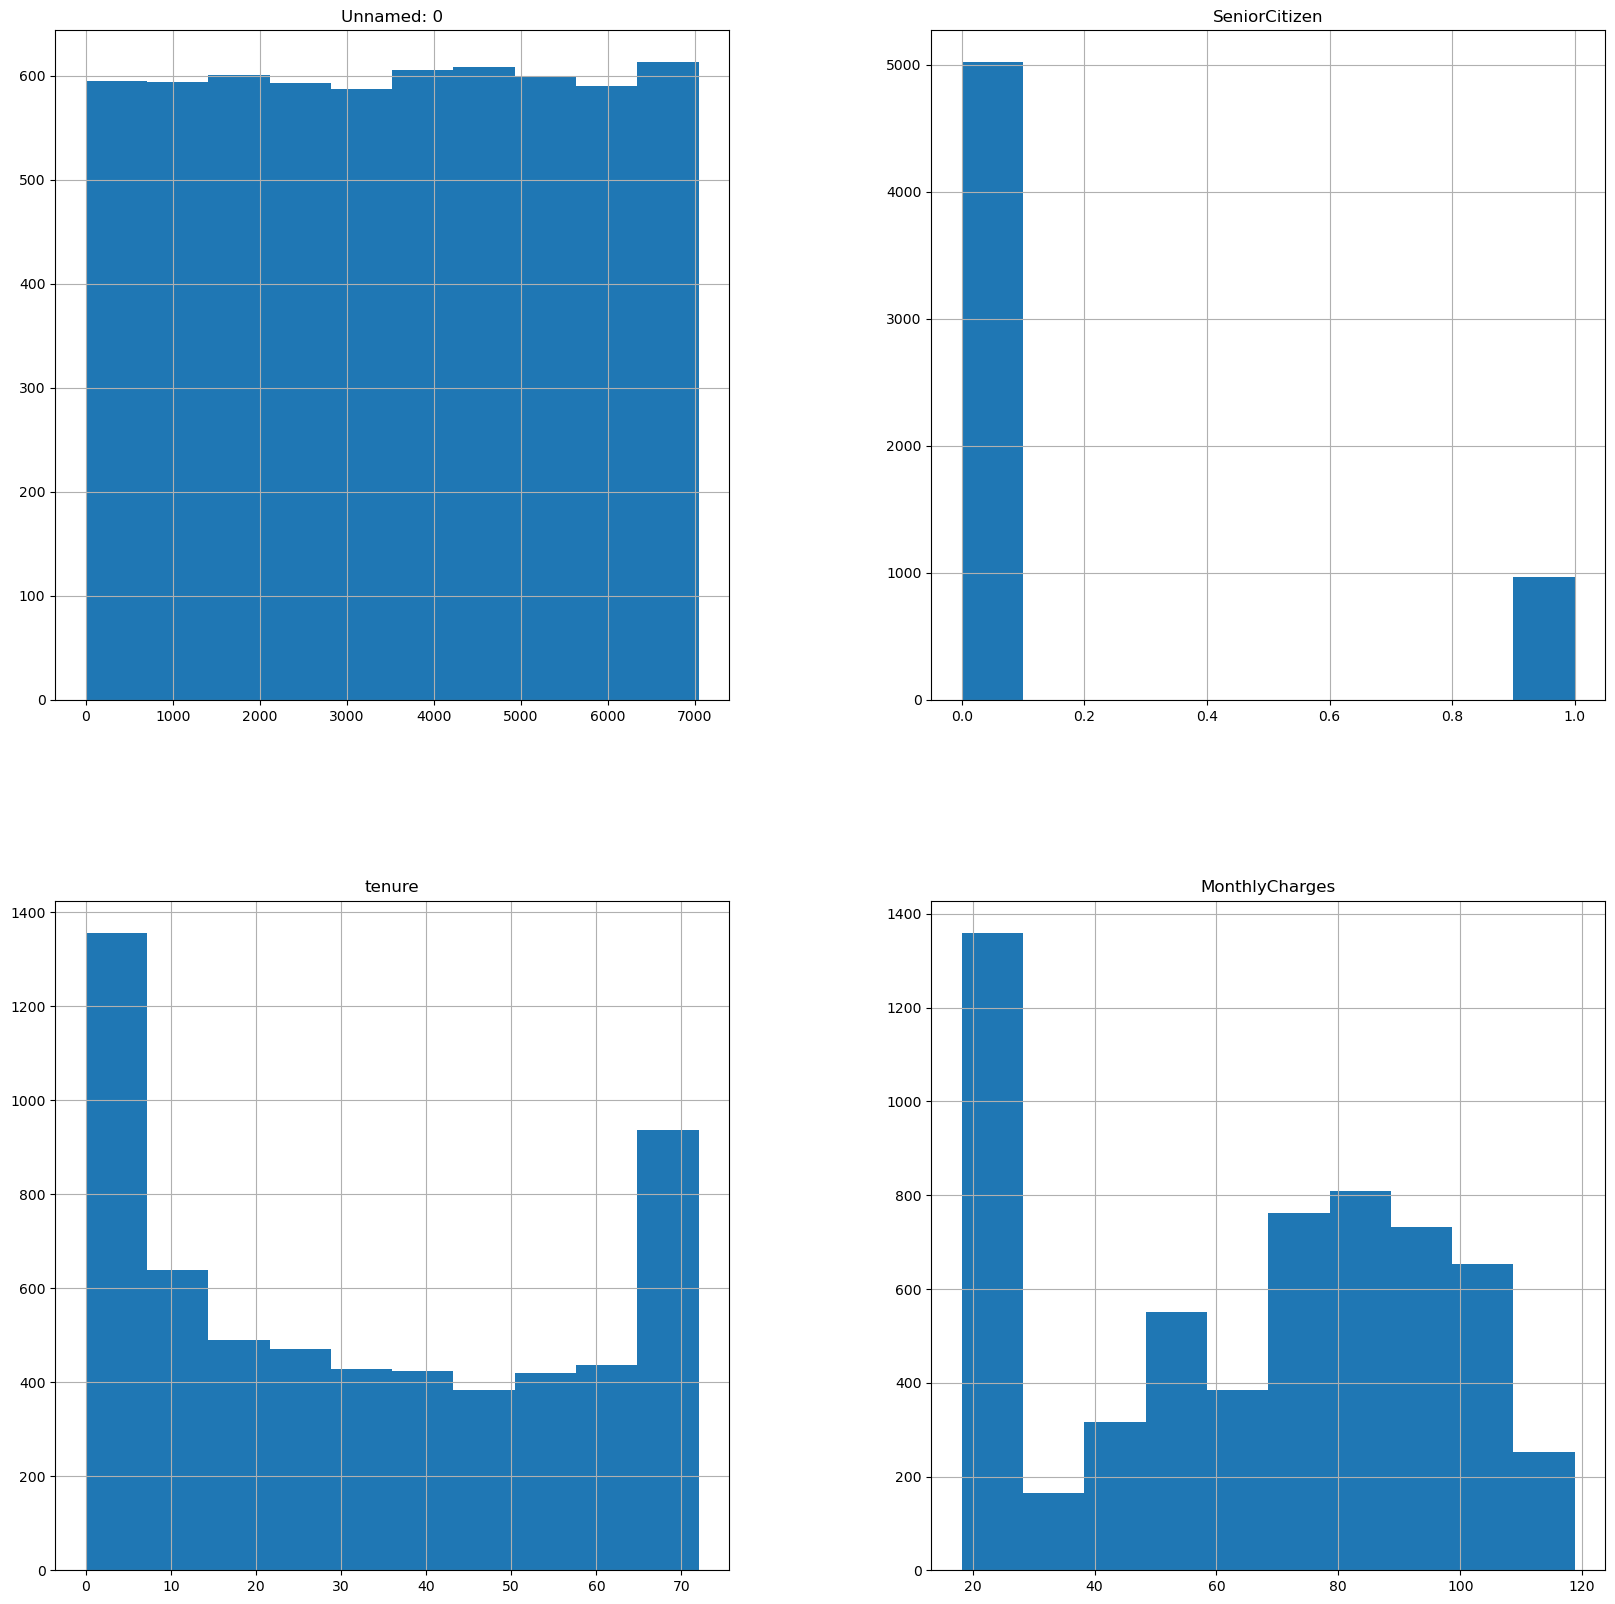

In [ ]:
df_label.hist(bins=10, figsize=(20, 20))

In [ ]:
correlation_matrix = df_label.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()